# Medical Treatment Cost Forecasting

**Link**

https://www.kaggle.com/mirichoi0218/insurance


**Context**

This dataset contains the cost of medical treatment of different patients.


**Content**

The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and predict the cost of medical treatment by using regression analysis.

The dataset consists of the following attributes:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height
- children: number of children covered by health insurance / Number of dependents
- smoker: smoking (0: no, 1: yes)
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: individual medical costs billed by health insurance

The `charges` attribute is our target variable, which should be predicted depending on new patient informations.

**Task (Regression)**

Your task is to use the present data set to predict the cost of medical treatment for new patients. To do this, use the `Linear Regression` and `SVR` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

# Code und Dokumentation

# Frame the problem

**1.1 Ziel** 

Das primäre Ziel besteht darin, die Kosten der medizinischen Behandlung für neue Patienten basierend auf verschiedenen Faktoren wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion vorherzusagen. Genaue Vorhersagen können Versicherungsunternehmen helfen, Prämien festzulegen, finanzielle Risiken zu managen und personalisierte Gesundheitspläne zu erstellen.
   
**1.2 Verwendung der Lösung**

Die Lösung wird in den Arbeitsablauf des Versicherungsunternehmens integriert, um die Kosten der medizinischen Behandlung für neue Versicherungsnehmer abzuschätzen oder die Prämien für bestehende Versicherungsnehmer anzupassen. Dieses prädiktive Modell ermöglicht es dem Unternehmen, Risiken genauer zu bewerten und wettbewerbsfähige Preise anzubieten, während die Rentabilität sichergestellt wird

**1.3 Aktuelle Lösungen**

Versicherungsunternehmen verwenden in der Regel versicherungsmathematische Methoden (Traditionelle statistische Methoden) und manuelle Schätzungen (Komplexe Regeln) zur Kostenschätzung auf der Grundlage historischer Daten und demografischer Profile. Diese Methoden können zeitaufwändig, kostenintensiv, weniger genau sein und möglicherweise keine komplexen Muster in den Daten erfassen. Ein auf maschinellem Lernen basierter Ansatz kann präzisere und skalierbarere Lösungen bieten. [1]

[1] U. Orji und E. Ukwandu, "Machine Learning For An Explainable Cost Prediction of Medical Insurance," arXiv, Nov. 2023. [Online]. Verfügbar: https://ar5iv.org/abs/2311.14139. [Zugegriffen: 20. Juni 2024].


**1.4 Problemdefinition**

Typ: Überwachtes Lernen
Herangehensweise: Regression
Modus: Offline
Begründung:
Wir haben historische Daten mit bekannten Kosten (Gebühren) und damit verbundenen Merkmalen. Das Ziel ist die Vorhersage einer kontinuierlichen Variable, was es zu einem Regressionsproblem macht. Ein Offline-Ansatz ist angemessen, da wir das Modell auf historischen Daten trainieren und es dann für zukünftige Vorhersagen einsetzen werden.

**1.5 Leistungsmessung**

Die Leistung wird anhand des Root Mean Squared Error (RMSE) und des Mean Absolute Error (MAE) gemessen. RMSE wird wegen seiner Empfindlichkeit gegenüber Ausreißern bevorzugt, was bei medizinischen Kosten signifikant sein kann.

**1.6 Ausrichtung an den Unternehmenszielen**

Die gewählten Leistungsmaße (RMSE und MAE) stimmen mit dem Geschäftsziel überein, Vorhersagefehler zu minimieren, um Behandlungskosten besser abzuschätzen und so finanzielle Risiken zu reduzieren.

**1.7 Erforderliche Mindestleistung**

Die Mindestleistung des neuen Modells sollte die Leistung bestehender Methoden übertreffen. Angenommen, die aktuellen manuellen Methoden haben folgende Fehlermaße:

RMSE: 4000
MAE: 3000

Ein realistischer Schwellenwert für das maschinelle Lernmodell könnte sein, diese Werte um mindestens 10% zu verbessern. Das bedeutet:

RMSE: 3600
MAE: 2700

Diese Verbesserungen würden signifikant genug sein, um die Überlegenheit des neuen Modells gegenüber den bestehenden Methoden zu demonstrieren.

**1.8 Vergleichbare Probleme**
- Hauspreisvorhersage
- Vorhersage von Kfz-Versicherungsansprüchen
- Vorhersage von Darlehenausfällen

**1.9 Wiederverwendung von Tools**

Wir können auf etablierte maschinelle Lernframeworks und -bibliotheken (wie Scikit-learn, TensorFlow oder XGBoost) und Methoden aus ähnlichen Regressionsaufgaben zurückgreifen. Werkzeuge wie Jupyter Notebooks, pandas und matplotlib werden für die Datenexploration und -visualisierung wesentlich sein.

**1.10 Verfügbarkeit von menschlicher Expertise**

Domänenexperten für Gesundheitskosten und Versicherungen sowie Datenwissenschaftler mit Erfahrung in der Regressionsanalyse werden entscheidend sein, um die Daten zu verstehen und die Modelle zu verfeinern

**1.11 Manuelle Lösung**

Manuell würde man historische Kosten analysieren, für Inflation anpassen, Patientendemografie und Gesundheitsindikatoren berücksichtigen und Expertenurteile verwenden, um zukünftige Kosten abzuschätzen. Dieser Prozess ist von Natur aus subjektiv und weniger skalierbar.

**1.12 Annahmen**
- Der Datensatz ist repräsentativ für die Bevölkerung.
- Die einbezogenen Faktoren (Alter, Geschlecht, BMI, Kinder, Raucher, Region) sind ausreichend, um die Kosten vorherzusagen.
- Es gibt keine signifikanten externen Faktoren (z. B. politische Veränderungen, große medizinische Fortschritte), die die Kosten drastisch verändern.

**1.13 Überprüfen der Annahmen**
- Statistische Tests und Visualisierungen (z. B. Korrelationsmatrizen, Streudiagramme) können die Relevanz der Merkmale überprüfen.
- Datenbereinigungsprozesse können Datenqualitätsprobleme angehen.
- Bewertung der anfängliche Modellleistung an einem Validierungssatz.


**1.14 Modellauswahl und Implementierung**
- Lineare Regression
- Support-Vektor-Regression (SVR)
- Random Forest

# Get the Data

**2.1 Impotieren von Bibliotheken die für die gesamte Aufgabe benötigt werden.**

In [313]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as holdout, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

**2.2 Einlesen der Excel-Daten (CSV-Datei) 'insurance'. Diese Datei enthält die Informationen über Patienten und die individuellen medizinischen Kosten, die wir vorhersagen wollen. Eine Kopie names 'insurance_data wird im Vorfeld erstellt, die die gleichen Daten enthält.**

In [314]:
data = pd.read_csv('insurance.csv')
insurance_data = data.copy()

**2.3 Konventierung der Daten in ein Format , das leicht zu manipulieren ist. (Kategorien als kategorische Daten)**

In [315]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [316]:
# Sicherstellen, dass die Daten korrekt typisiert sind
insurance_data['sex'] = insurance_data['sex'].astype('category')
insurance_data['smoker'] = insurance_data['smoker'].astype('category')
insurance_data['region'] = insurance_data['region'].astype('category')


# Prüfen der Datentypen
print(insurance_data.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


**2.4 Informationen über die Daten ausgeben.**

In [317]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


**2.5 Einblick in die ersten Zeilen der Daten**

In [318]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**2.6 Statistische Beschreibung der numerischen Daten**

In [319]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**2.7 Testdatenmenge erstellen und zur Seite legen: Der Trainings- und Testdatensatz werden erstellt. Der Testdatensatz wird beiseitegelegt und nicht während des Modelltrainings verwendet, um eine unvoreingenommene Bewertung des Modells zu gewährleisten.**

In [320]:
from sklearn.model_selection import train_test_split

# Merkmale (Features) und Zielvariable (Target) werden definiert
x = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Aufteilung in Trainings- und Testdatensatz
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**2.8 Daten visualisieren**

In [321]:
# Erstellen einer kombinierten Ansicht der Trainingsdaten zur Visualisierung, um die Erstellung von Diagrammen und die Durchführung von Analysen zu vereinfachen.
x_train_plot = x_train.copy()
y_train_plot = y_train.copy()

combined_training_plot = pd.concat([x_train_plot, y_train_plot], axis=1)

In [322]:
# Erster Blick auf die kombinierten Trainingsdaten
print(combined_training_plot.head())

      age     sex    bmi  children smoker     region      charges
560    46  female  19.95         2     no  northwest   9193.83850
1285   47  female  24.32         0     no  northeast   8534.67180
1142   52  female  24.86         0     no  southeast  27117.99378
969    39  female  34.32         5     no  southeast   8596.82780
486    54  female  21.47         3     no  northwest  12475.35130


In [323]:
#Umwandeln von Inf-Werten in NaN
combined_training_plot.replace([np.inf, -np.inf], np.nan, inplace=True)

Brauchen wir das also inf in nan ändern?

# Explore the Data

**3.1 Es wird, wie in der Aufgabenstellung verlangt, jedes Attribut (jede Spalte) im kombinierten Trainingsdatensatz untersucht und es werden verschiedene statistische Informationen über die Attribute ausgegeben.**

In [324]:
for column in combined_training_plot.columns:
    print(f'Attribut: {column}')
    print(f'Typ: {combined_training_plot[column].dtype}')
    print(f'Fehlende Werte (%): {combined_training_plot[column].isnull().mean() * 100:.2f}%')
    print(f'Einzigartige Werte: {combined_training_plot[column].nunique()}')
    # Überprüfung der Standardabweichung nur für numerische Spalten
    if pd.api.types.is_numeric_dtype(combined_training_plot[column]):
        print(f'Standardabweichung (Rauschen): {combined_training_plot[column].std()}')
    print(combined_training_plot[column].describe())
    print('-' * 100)


Attribut: age
Typ: int64
Fehlende Werte (%): 0.00%
Einzigartige Werte: 47
Standardabweichung (Rauschen): 14.073960139337272
count    1070.000000
mean       39.357009
std        14.073960
min        18.000000
25%        27.000000
50%        39.500000
75%        51.000000
max        64.000000
Name: age, dtype: float64
----------------------------------------------------------------------------------------------------
Attribut: sex
Typ: category
Fehlende Werte (%): 0.00%
Einzigartige Werte: 2
count     1070
unique       2
top       male
freq       548
Name: sex, dtype: object
----------------------------------------------------------------------------------------------------
Attribut: bmi
Typ: float64
Fehlende Werte (%): 0.00%
Einzigartige Werte: 494
Standardabweichung (Rauschen): 6.043385672727495
count    1070.000000
mean       30.560397
std         6.043386
min        15.960000
25%        26.205000
50%        30.210000
75%        34.496250
max        53.130000
Name: bmi, dtype: float64

Die Anzahl der fehlenden Werte für jedes Attribut wird überprüft.

In [325]:
print(combined_training_plot.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**3.2 Zielattribut identifizieren**

In [326]:
target_attribute = 'charges'
print(f'Das Zielattribut für überwachtes Lernen ist: {target_attribute}')

Das Zielattribut für überwachtes Lernen ist: charges


**3.3 Daten visualisieren**

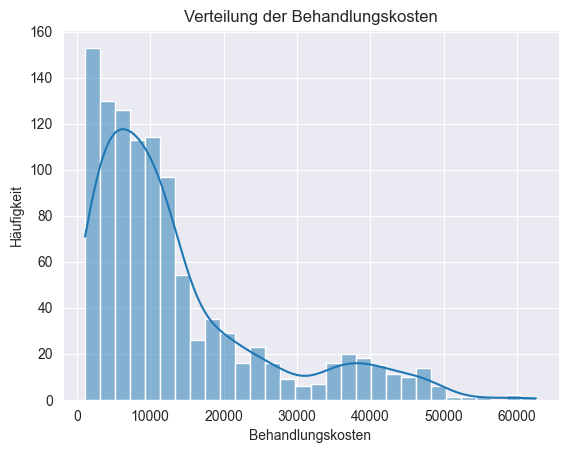

In [327]:
# Histogramm der Behandlungskosten
plt.figure()
sns.histplot(combined_training_plot['charges'], bins=30, kde=True)
plt.title('Verteilung der Behandlungskosten')
plt.xlabel('Behandlungskosten')
plt.ylabel('Häufigkeit')
plt.show()

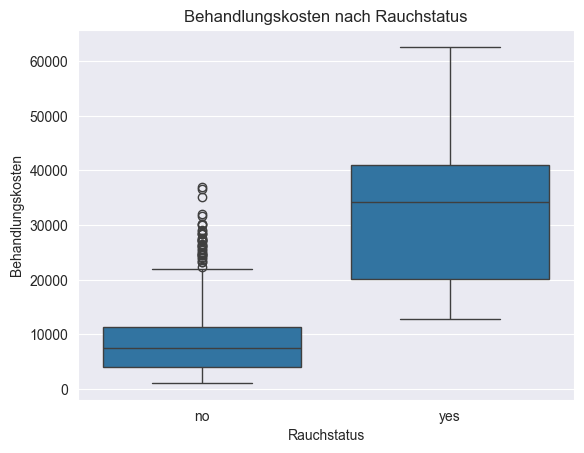

In [328]:
#Boxplot von Behandlungskosten nach Rauchstatus
plt.figure()
sns.boxplot(x='smoker', y='charges', data=combined_training_plot)
plt.title('Behandlungskosten nach Rauchstatus')
plt.xlabel('Rauchstatus')
plt.ylabel('Behandlungskosten')
plt.show()

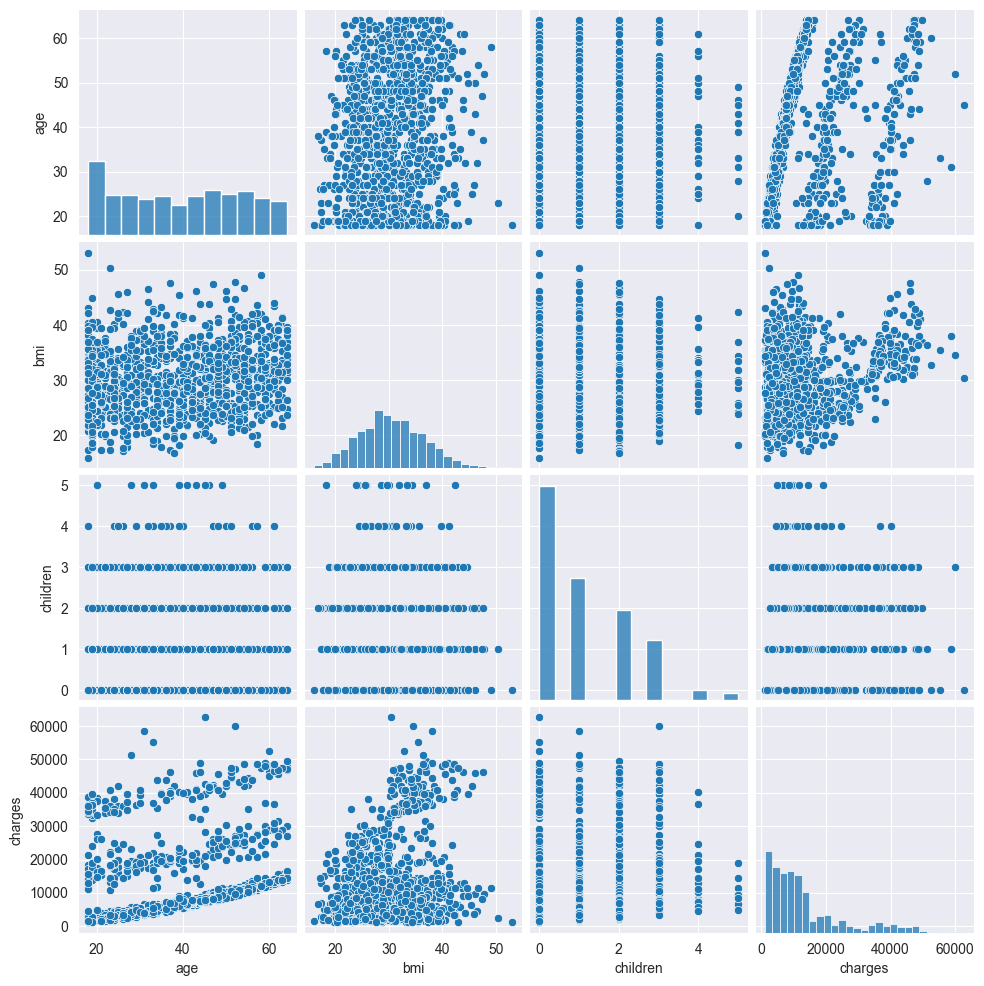

In [329]:
# Paarweise Streudiagramme (Pairplot) für ausgewählte Attribute
selected_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(combined_training_plot[selected_features])
plt.show()

In [330]:
#Die Variablen, die verschiedene Werte enthalten, zB männlich und weiblich bei Geschlecht, werden jetzt unterteilt in die Anzahl ihrer Werte, sodass die Angaben nur noch True oder False enthalten.
# Kategoriale Variablen in numerische Werte umwandeln für Korrelationen
combined_training_plot_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

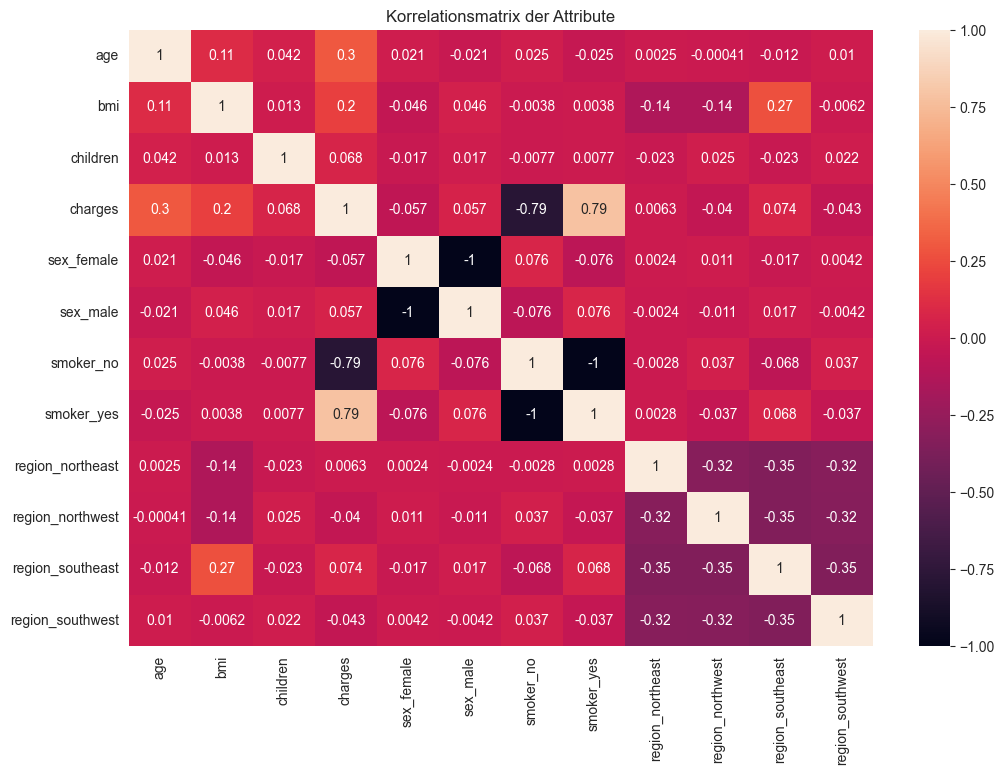

In [331]:
# Korrelationsmatrix berechnen mit den kodierten Daten
correlation_matrix = combined_training_plot_encoded.corr()

# Heatmap der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Korrelationsmatrix der Attribute')
plt.show()


**3.4 Dokumentation der Transformationen**

1. **Log-Transformation der Behandlungskosten:**
   - Die Spalte `charges` soll logarithmisch transformiert werden, um die rechtsschiefe Verteilung zu normalisieren.

2. **Standardisierung der numerischen Variablen:**
   - Alle numerischen Features wurden standardisiert, um einen Mittelwert von 0 und eine Standardabweichung von 1 zu haben.

3. **One-Hot-Encoding der kategorialen Variablen:**
   - Die kategorialen Variablen `sex` und `smoker` sollen mittels One-Hot-Encoding in numerische Formate umgewandelt werden.

4. **Umgang mit Ausreißern:**
   - Datenpunkte, die mehr als 3 Standardabweichungen vom Mittelwert sollen entfernt werden,.



**3.5 Ergebnisse**



**Übersicht der Daten**
- Der Datensatz enthält 1338 Einträge mit 7 Merkmalen und der Zielvariable "charges".
- Die Merkmale umfassen demografische Informationen wie Alter, Geschlecht, BMI, Anzahl der Kinder, Rauchstatus und Wohnregion.

**Verteilungen der Merkmale**
- Die Verteilung der Behandlungskosten ist rechtsschief, was auf einige hohe Kostenfälle hinweist.
- Das Boxplot der Behandlungskosten nach Rauchstatus zeigt, dass Raucher tendenziell höhere Behandlungskosten haben als Nichtraucher.

**Korrelationen**
- Es gibt eine starke positive Korrelation zwischen "charges" und "smoker" (Rauchstatus), was darauf hindeutet, dass Raucher höhere Behandlungskosten haben.
- Auch das Alter und der BMI zeigen eine positive Korrelation mit den Behandlungskosten.


**Fazit**
- Die explorative Analyse hat wertvolle Einblicke in die Struktur und Beziehungen der Daten geliefert. Diese Erkenntnisse werden bei der Auswahl und Vorbereitung der Modelle berücksichtigt.


# Prepare the Data

**4.1 Clean the Data**

Das Auffüllen von fehlenden Daten ist nicht notwendig, da es keine fehlenden Werte im Datensatz gibt (siehe 3.1). Allerdings können im Testdatensatz Daten fehlen. 

Die Features werden aufgeteilt in numerische und kategorische Features anhand von 2.3, um einen passenden Transformer anzuwenden.

In [332]:
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

Für die numerische Werte 

In [333]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Für kategorische

In [334]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [335]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


In [339]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}



Cross-Validation Ergebnisse:
Finale Ergebnisse auf dem Testdatensatz:


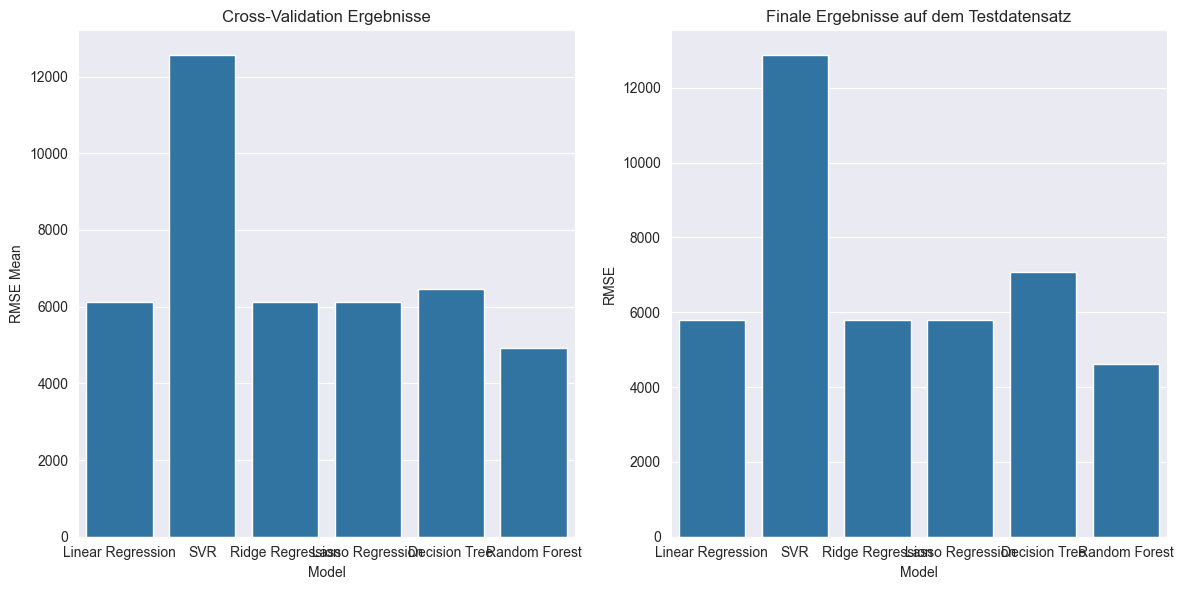

In [357]:
# 4. Kreuzvalidierung und Training der Modelle
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation: Modelltraining und Evaluation
def evaluate_model_with_cv(model, x, y, cv):
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)
    mse_scores = cross_val_score(model, x, y, scoring=mse_scorer, cv=cv)
    r2_scores = cross_val_score(model, x, y, scoring=r2_scorer, cv=cv)
    rmse_scores = np.sqrt(-mse_scores)
    return rmse_scores, r2_scores



# Cross-Validation Ergebnisse
cv_results = {'Model': [], 'RMSE Mean': [], 'RMSE Std': [], 'R2 Mean': [], 'R2 Std': []}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    rmse_scores, r2_scores = evaluate_model_with_cv(pipeline, x_train, y_train, kf)
    cv_results['Model'].append(name)
    cv_results['RMSE Mean'].append(rmse_scores.mean())
    cv_results['RMSE Std'].append(rmse_scores.std())
    cv_results['R2 Mean'].append(r2_scores.mean())
    cv_results['R2 Std'].append(r2_scores.std())

final_results = {'Model': [], 'RMSE': [], 'R2 Score': [], 'y_pred': []}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    final_results['Model'].append(name)
    final_results['RMSE'].append(rmse)
    final_results['R2 Score'].append(r2)
    final_results['y_pred'].append(y_pred)
    
# Ergebnisse der Cross-Validation
cv_results_df = pd.DataFrame(cv_results)

# Ergebnisse der finalen Bewertung
final_results_df = pd.DataFrame(final_results)

# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE Mean', data=cv_results_df)
plt.title('Cross-Validation Ergebnisse')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=final_results_df)
plt.title('Finale Ergebnisse auf dem Testdatensatz')

plt.tight_layout()
plt.show()


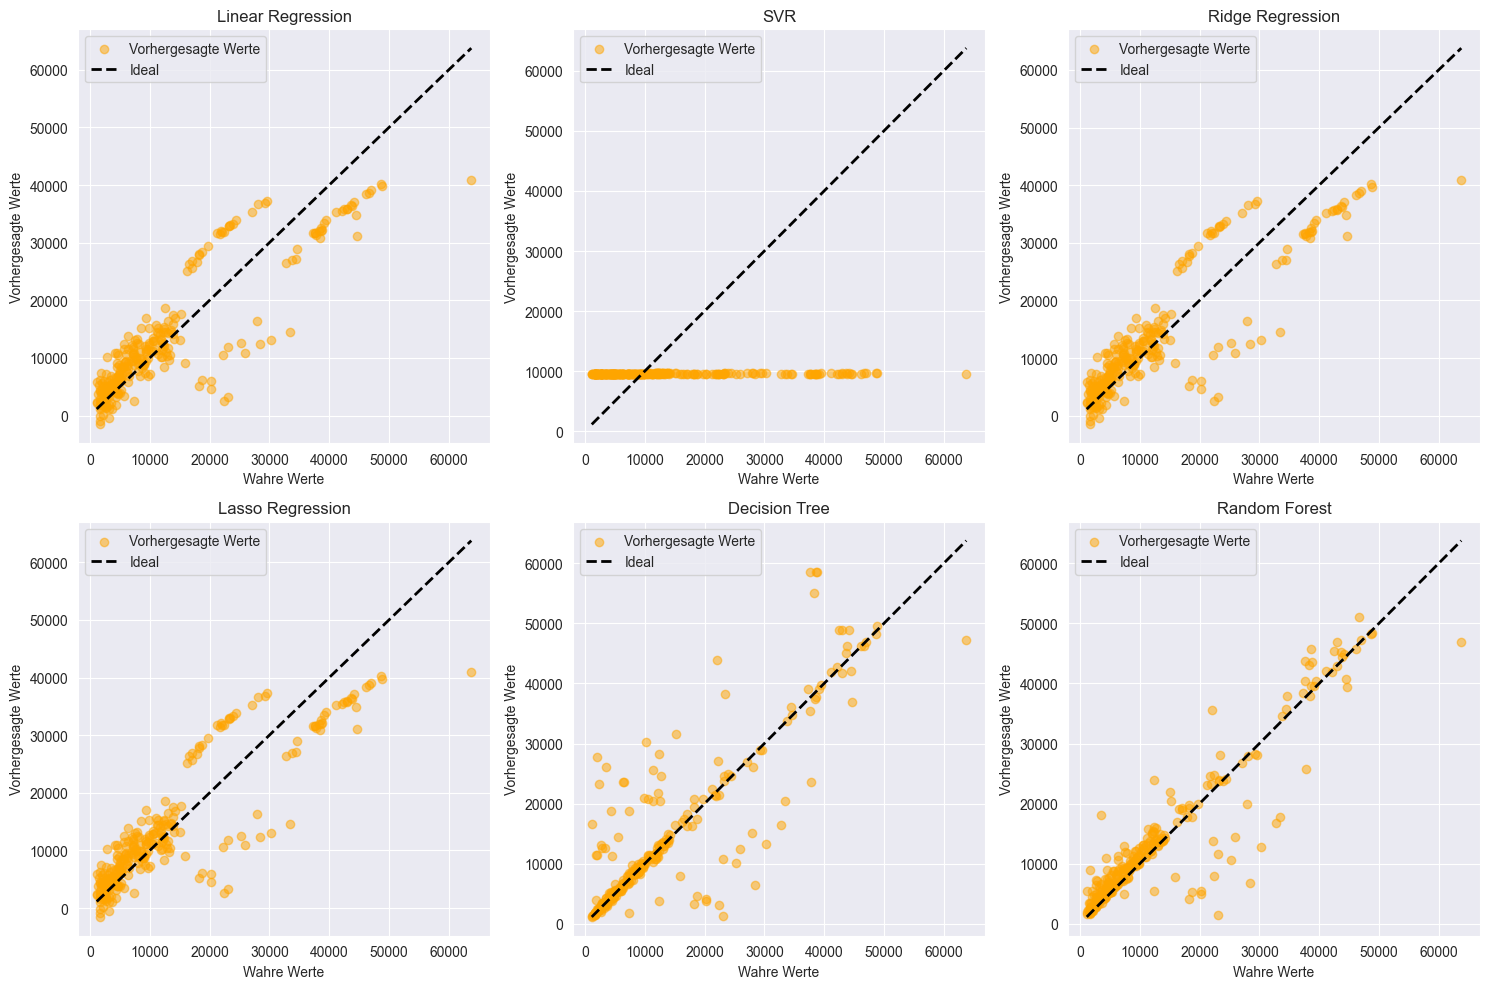

In [341]:
# Modellnamen zur Identifikation in der Ergebnismatrix
model_names = ["Linear Regression", "SVR", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest"]

# Ermittlung der Indizes der Modelle, basierend auf ihrer Position in results_df und model_names
# Wichtig: Stellen Sie sicher, dass die Reihenfolge in results_df mit model_names übereinstimmt.
# Dieser Schritt ist abhängig von der genauen Struktur Ihrer results_df.

# Erstellen der 3x2 Subplot-Matrix
fig, axes = plt.subplots(2,3, figsize=(15, 10))
axes = axes.flatten() # Umwandlung der Achsen-Struktur in eine einfache Liste für leichteres Iterieren

for i, model_name in enumerate(model_names):
    ax = axes[i]

    y_pred = final_results_df.iloc[i]['y_pred']
    
    # Scatter-Plot der vorhergesagten Werte
    ax.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Vorhergesagte Werte')
    
    # Ideal-Linie
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
    
    # Beschriftungen und Titel
    ax.set_xlabel('Wahre Werte')
    ax.set_ylabel('Vorhergesagte Werte')
    ax.set_title(f'{model_name}')
    ax.legend()

# Anpassung des Layouts für bessere Lesbarkeit
plt.tight_layout()
plt.show()

### 6. Fine-Tune der Modelle

Im Folgenden wird probiert die Vorhersagefähigkeit der Modelle noch weiter zu steigern

#### Decision Tree mithilfe von Random Search

In [342]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Definition der Parameterbereiche, angepasst für DecisionTreeRegressor
param_distribs_dectree = {
    'max_depth': [3, 5, 10, None],  # Einschließlich der Möglichkeit von unbegrenzten Tiefen
    'min_samples_split': randint(low=2, high=20),  # Zufällige Auswahl von 2 bis 20
    'min_samples_leaf': randint(low=1, high=20),  # Zufällige Auswahl von 1 bis 20
    'max_features': randint(low=1, high=transformed_x_train.shape[1] + 1)  # Basierend auf der Anzahl der Features
}

# Erstellung des DecisionTreeRegressor-Modells
decisiontree_reg = DecisionTreeRegressor(random_state=42)

# Initialisierung von RandomizedSearchCV mit den spezifischen Einstellungen für den DecisionTree
rnd_search_dectree = RandomizedSearchCV(decisiontree_reg, param_distributions=param_distribs_dectree,
                                        n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Durchführung der Suche auf den Trainingsdaten
rnd_search_dectree.fit(transformed_x_train, y_train)

# Ausgabe der besten Parameter und des besten Modells
print("Beste Parameter: ", rnd_search_dectree.best_params_)
print("Bester Entscheidungsbaum: ", rnd_search_dectree.best_estimator_)

Beste Parameter:  {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 12, 'min_samples_split': 18}
Bester Entscheidungsbaum:  DecisionTreeRegressor(max_features=10, min_samples_leaf=12,
                      min_samples_split=18, random_state=42)


In [343]:
feature_importances_rnds_dectree = rnd_search_dectree.best_estimator_.feature_importances_

In [344]:

cat_encoder = transformer.named_transformers_['cat'].named_steps['encoder']

cat_one_hot_attribs = cat_encoder.get_feature_names_out(cat_features)

# Kombinieren der numerischen und kategorialen Feature-Namen 
attributes = num_features + list(cat_one_hot_attribs)

# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores = sorted(zip(feature_importances_rnds_dectree, attributes), reverse=True)

for score, attrib in importance_scores:
    print(attrib, score)

smoker_no 0.688794467147515
bmi 0.18129923112207905
age 0.11756193326924175
children 0.007249442118993671
region_northeast 0.0032811676103821044
region_southwest 0.0004488463157359625
sex_female 0.00040624136992761936
sex_male 0.00039887975616406055
region_northwest 0.0003783535088992601
region_southeast 0.00018143778106147616
smoker_yes 0.0


In [345]:
final_model_rnds_dectree = rnd_search_dectree.best_estimator_


final_predictions_rnds_dectree = final_model_rnds_dectree.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_rnds_dectree)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_rnds_dectree)
print(r2final)

4627.413329043738
21412954.117811646
0.8620732426470982


#### Decision Tree mithilfe von Grid Search

In [346]:
param_grid_dectree = [
    {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1], 'max_features': [2, 4, 6, 8]}
]

decisiontree_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds
grid_search_dectree = GridSearchCV(decisiontree_reg, param_grid_dectree, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_dectree.fit(transformed_x_train, y_train)

# Ausgabe der besten Parameter und des besten Schätzers
print("Beste Parameter: ", grid_search_dectree.best_params_)
print("Bester Entscheidungsbaumregressor: ", grid_search_dectree.best_estimator_)

Beste Parameter:  {'ccp_alpha': 0.001, 'max_features': 6}
Bester Entscheidungsbaumregressor:  DecisionTreeRegressor(ccp_alpha=0.001, max_features=6, random_state=42)


In [347]:
feature_importances_grids_dectree = grid_search_dectree.best_estimator_.feature_importances_

In [348]:

# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores_dectree_grids = sorted(zip(feature_importances_grids_dectree, attributes), reverse=True)

for score, attrib in importance_scores_dectree_grids:
    print(attrib, score)

smoker_no 0.6095289620257277
bmi 0.20514293385923962
age 0.13346276863545337
children 0.021872739786661866
region_southeast 0.009070738659540813
region_northeast 0.005773309845181921
region_northwest 0.004284991567360079
sex_female 0.0040671651106653295
region_southwest 0.003941997277198762
sex_male 0.0028543932329704535
smoker_yes 0.0


In [349]:
final_model_grids_dectree = grid_search_dectree.best_estimator_


final_predictions_grids_dectree = final_model_grids_dectree.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_grids_dectree)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_grids_dectree)
print(r2final)

6005.82723885673
36069960.82299346
0.7676634103454509


## Jetzt mit Random Forest und Random Search

In [350]:
param_distribs_rf_rs = {
        'n_estimators': randint(low=1, high=150),
        'max_features': randint(low=1, high=8),
    }

randomforest_reg = RandomForestRegressor(random_state=42)
rnd_search_rnd_forest = RandomizedSearchCV(randomforest_reg, param_distributions=param_distribs_rf_rs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_rnd_forest.fit(transformed_x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021CDDDECC50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021CDDB6F1D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [351]:
rnd_search_rnd_forest.best_params_

{'max_features': 5, 'n_estimators': 100}

In [352]:
rnd_search_rnd_forest.best_estimator_

RandomForestRegressor(max_features=5, random_state=42)

In [353]:
feature_importances_rndsearch_rndforest = rnd_search_rnd_forest.best_estimator_.feature_importances_
feature_importances_rndsearch_rndforest

array([0.14032922, 0.18831699, 0.0230048 , 0.00493845, 0.00454404,
       0.28737838, 0.33010198, 0.00580561, 0.00521445, 0.00654471,
       0.00382136])

In [354]:
# Zusammenstellen der Feature-Wichtigkeiten und der Feature-Namen
importance_scores_rndsearch_randomforest = sorted(zip(feature_importances_rndsearch_rndforest, attributes), reverse=True)

for score, attrib in importance_scores_rndsearch_randomforest:
    print(attrib, score)

smoker_yes 0.3301019845385152
smoker_no 0.2873783836848969
bmi 0.18831699212058217
age 0.1403292169242826
children 0.023004795671815754
region_southeast 0.006544713122635331
region_northeast 0.005805609883995696
region_northwest 0.0052144512790023795
sex_female 0.0049384524581677835
sex_male 0.004544038586538503
region_southwest 0.003821361729567661


In [355]:
final_model_rndsearch_rndforest = rnd_search_rnd_forest.best_estimator_


final_predictions_rndsearch_rndforest = final_model_rndsearch_rndforest.predict(transformed_x_test)

final_mse = mean_squared_error(y_test, final_predictions_rndsearch_rndforest)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_mse)
r2final = r2_score(y_test, final_predictions_rndsearch_rndforest)
print(r2final)

4541.672878563329
20626792.53587771
0.867137126740577


# Random Forest und Grid Search